# Normal distribution

In this tutorial we'll investigate the probability distribution that is most central to statistics: the normal distribution. If we are confident that our data are nearly normal, that opens the door to many powerful statistical methods. Here we'll use the graphical tools of Python to assess the normality of a dataset and also learn how to generate random numbers from a normal distribution.

In [1]:
# for Mac OS users only!
# if you run into any SSL certification issues, 
# you may need to run the following command for a Mac OS installation.
# $/Applications/Python 3.x/Install Certificates.command
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

## The data

Here we'll be working with measurements of body dimensions. This data set contains measurements from 247 men and 260 women, most of whom were considered healthy young adults.

In [2]:
import numpy as np
import pandas as pd

bdims = pd.read_csv('https://www.openintro.org/stat/data/bdims.csv')

Let's take a quick peek at the first few rows of the data.

In [3]:
pd.set_option('display.max_columns', None)
print(bdims.shape)
bdims.head()

(507, 25)


,bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,che.gi,wai.gi,nav.gi,hip.gi,thi.gi,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,89.5,71.5,74.5,93.5,51.5,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,97.0,79.0,86.5,94.8,51.5,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,97.5,83.2,82.9,95.0,57.3,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,97.0,77.8,78.8,94.0,53.0,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,97.5,80.0,82.5,98.5,55.4,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1


You'll see that for every observation we have 21 measurements, many of which are either diameters or girths. A key to the variable names can be found [here](https://www.openintro.org/book/statdata/?data=bdims), but we'll be focusing on just three columns to get started: weight in kg (`wgt`), height in cm (`hgt`), and `sex` (1 indicates male, 0 indicates female).

Since men and women tend to have different body dimensions, it will be useful to create two additional data sets: one with only men and another one with only women.

In [4]:
mdims = bdims[bdims['sex'] == 1]
fdims = bdims[bdims['sex'] == 0]

<div class = 'exercise'>
<h4>Exercise 1</h4>
Make a histogram of men's heights and a histogram of women's heights. How would you compare the various aspects of the two distributions?
</div>

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# the %matplotlib can simply output the graphs within the notebook itself.
%matplotlib inline

# use the retina format and see which one looks better on your computer's screen.
%config InlineBackend.figure_format = 'retina'

Before showing histograms, I will show the description of men's heights and women's heights

In [6]:
# To show description of men's heights
mdims.hgt.describe()

count    247.000000
mean     177.745344
std        7.183629
min      157.200000
25%      172.900000
50%      177.800000
75%      182.650000
max      198.100000
Name: hgt, dtype: float64

In [7]:
# To show description of women's heights
fdims.hgt.describe()

count    260.000000
mean     164.872308
std        6.544602
min      147.200000
25%      160.000000
50%      164.500000
75%      169.500000
max      182.900000
Name: hgt, dtype: float64

To draw thistograms for men's heights and women's heights respectively.

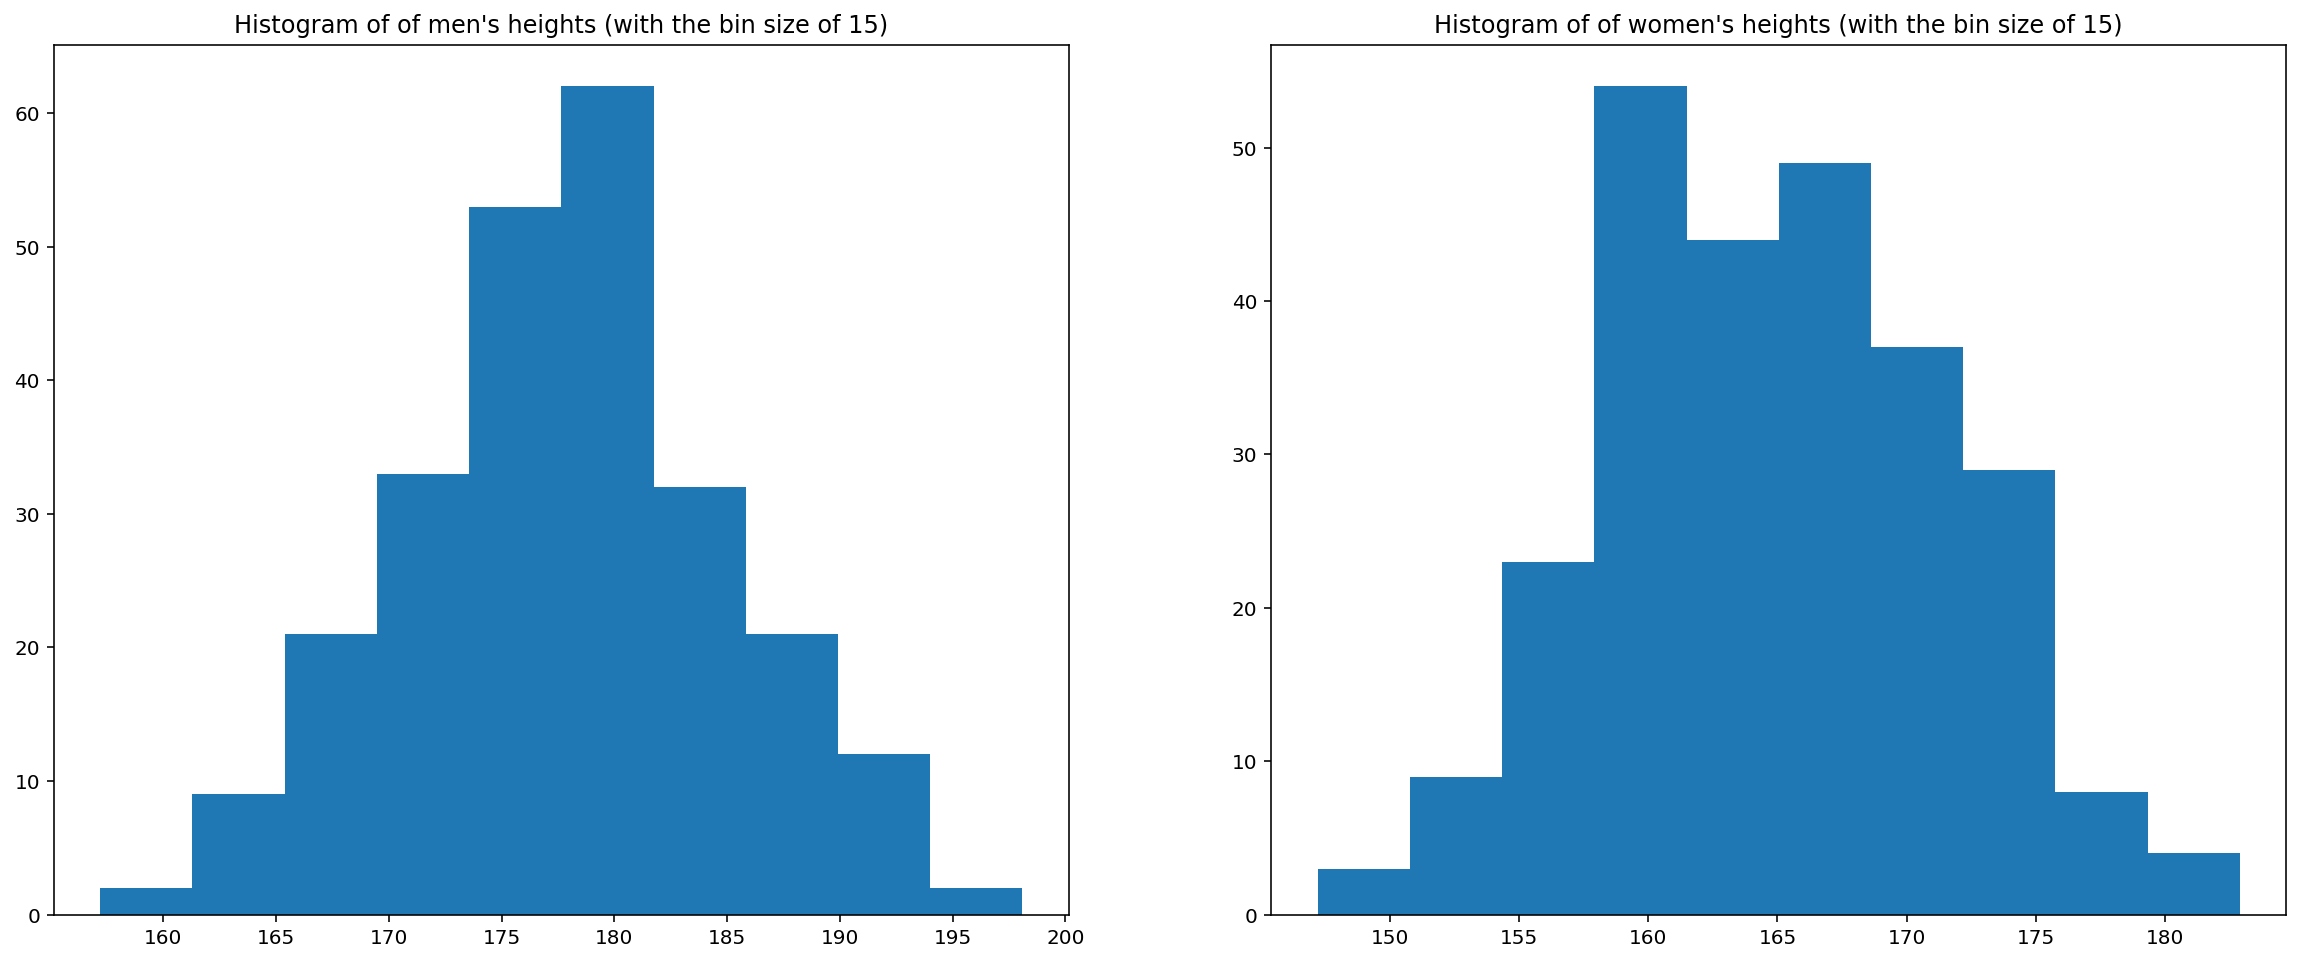

In [8]:
bins = 15

# Using matplotlib
# define a Matplotlib figure
plt.figure(figsize=(20, 8))

# subplot ('122' = 1x2, position 1)
plt.subplot(121)

# define the type of plot you want to appear
plt.hist(mdims.hgt, density=0)

# give the plot a title
plt.title('Histogram of of men\'s heights (with the bin size of 15)')

# Here we'll blank out the x-axis label since it isn't really meaningful
# for a box plot
#plt.xlabel(' ')

# specify the number of bins to use in the histogram
plt.locator_params(nbins=bins, axis = 'x')

# subplot ('122' = 1x2, position 2)
plt.subplot(122)

# define the type of plot you want to appear
plt.hist(fdims.hgt, density=0)

# give the plot a title
plt.title('Histogram of of women\'s heights (with the bin size of 15)')

# specify the number of bins to use in the histogram
plt.locator_params(nbins=bins, axis = 'x')

plt.show()

### Answer of Exercise 1
The above descriptions and histograms show as followed:

- Shape

The histogram of men's heights shows symmetry of distribution and is a unimodal. 

The histogram of women's heights shows symmetry of distribution and is a unimodal. 

- Center

The histogram of men's heights has mean of 177.75 and std of 7.18. The 50% of men's heights concentrate between 172.90 and 182.65.

The histogram of women's heights has mean of 164.87 and std of 6.54. The 50% of women's heights concentrate between 160.00 and 169.50.

- Spread

The max and min of men's heights are 198.10 and 157.20 respectively.
The max and min of women's heights are 182.90 and 147.20 respectively.

- Outliers

The men's heights has IQR (Q3 - Q1) = (182.65 - 172.90) = 9.75. The low outlier line is Q1 - 1.5IQR = 172.90 - 19.5 = 153.4. The high outlier line is Q3 + 1.5IQR = 182.65 + 19.5 = 202.15. There are not the low outliers and high outliers on data of men's heights.

The men's heights has IQR (Q3 - Q1) = (169.50 - 160.00) = 9.50. The low outlier line is Q1 - 1.5IQR = 160.00 - 14.25 = 145.75. The high outlier line is Q3 + 1.5IQR = 169.50 + 14.25 = 183.75. There are not the low outliers and high outliers on data of women's heights.

## The normal distribution

In your description of the distributions, did you use words like *bell-shaped or normal*? It's tempting to say so when faced with a unimodal symmetric distribution.

To see how accurate that description is, we can plot a normal distribution curve on top of a histogram to see how closely the data follow a normal distribution. This normal curve should have the same mean and standard deviation as the data. We'll be working with women's heights, so let's store them as a separate object and then calculate some statistics that will be referenced later.

In [9]:
fhgtmean = fdims['hgt'].mean()
fhgtsd = fdims['hgt'].std()

Next we make a density histogram to use as the backdrop and use the `seaborn.distplot()` function to overlay a normal probability curve. The difference between a frequency histogram and a density histogram is that while in a frequency histogram the heights of the bars add up to the total number of observations, in a density histogram the areas of the bars add up to 1. The area of each bar can be calculated as simply the height times the width of the bar. Using a density histogram allows us to properly overlay a normal distribution curve over the histogram since the curve is a normal probability density function. Frequency and density histograms both display the same exact shape; they only differ in their y-axis. You can verify this by comparing the frequency histogram you constructed earlier and the density histogram created by the commands below.

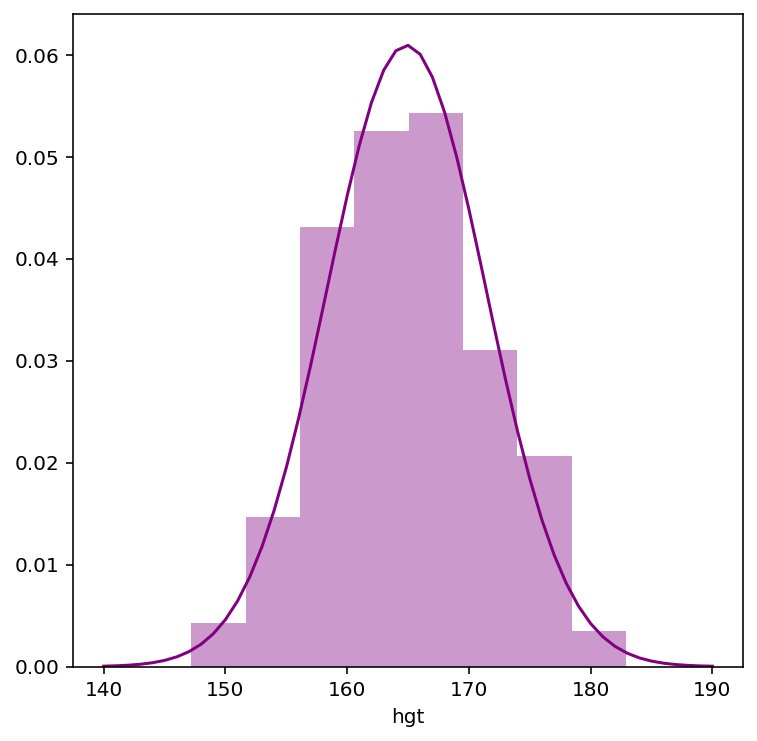

In [10]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (6, 6)

fhgt_hist = sns.distplot(fdims['hgt'], norm_hist = True, kde = False, color = 'purple', bins = 8)
x = np.arange(140, 191)                                                  
y = norm.pdf(x, loc = fhgtmean, scale = fhgtsd)                                                         
fhgt_hist.plot(x, y, 'purple');

After plotting the density histogram, we create the x- and y-coordinates for the normal curve. We chose the x range as 140 to 190 in order to span the entire range of women's heights. To create y, we use `norm.pdf()` from `scipy.stats` to calculate the density of each of those x-values in a distribution that is normal with mean (`fhgtmean`) and standard deviation (`fhgtsd`). The final command draws a curve on the existing density histogram by connecting each of the points specified by x and y. 

<div class = 'exercise'>
<h4>Exercise 2</h4>
Based on the this plot, does it appear that the data follow a nearly normal distribution?
</div>

In [11]:
# To show description of women's heights
fdims.hgt.describe()

count    260.000000
mean     164.872308
std        6.544602
min      147.200000
25%      160.000000
50%      164.500000
75%      169.500000
max      182.900000
Name: hgt, dtype: float64

I'm going to check the rule 68-95-99.7%.

1）Checking 68%, 1 std
To find out the value is (μ - σ) and (μ + σ).
(μ - σ) = 164.87 - 6.54 = 158.33
(μ + σ) = 164.87 + 6.54 = 171.41

2）Checking 95%, 2 std
To find out the value is (μ - σ) and (μ + σ).
(μ - 2σ) = 164.87 - 13.08 = 151.79
(μ + 2σ) = 164.87 + 13.08 = 177.95

3）Checking 99.5%, 3 std
To find out the value is (μ - σ) and (μ + σ).
(μ - 3σ) = 164.87 - 19.62 = 145.25
(μ + 3σ) = 164.87 + 19.62 = 184.49

In [12]:
len_lt_mean_minus_1std = len(fdims[fdims['hgt'] <= 158.33])
len_lt_mean_plus_1std = len(fdims[fdims['hgt'] <= 171.41])
len_1std = len_lt_mean_plus_1std - len_lt_mean_minus_1std
ratio_1std = len_1std / len(fdims)

print('The radio of ((μ -/+ σ)) = %.4f' %ratio_1std)

The radio of ((μ -/+ σ)) = 0.6923


In [13]:
len_lt_mean_minus_2std = len(fdims[fdims['hgt'] <= 151.79])
len_lt_mean_plus_2std = len(fdims[fdims['hgt'] <= 177.95])
len_2std = len_lt_mean_plus_2std - len_lt_mean_minus_2std
ratio_2std = len_2std / len(fdims)

print('The radio of ((μ -/+ 2σ)) = %.4f' %ratio_2std)

The radio of ((μ -/+ 2σ)) = 0.9615


In [14]:
len_lt_mean_minus_3std = len(fdims[fdims['hgt'] <= 145.25])
len_lt_mean_plus_3std = len(fdims[fdims['hgt'] <= 184.49])
len_3std = len_lt_mean_plus_3std - len_lt_mean_minus_3std
ratio_3std = len_3std / len(fdims)

print('The radio of ((μ -/+ 3σ)) = %.4f' %ratio_3std)

The radio of ((μ -/+ 3σ)) = 1.0000


### Answer of Exercise 2

69.23% of data is in (μ -/+ σ). 96.15% of data is in (μ -/+ 2σ). 100% of data is in (μ -/+ 3σ).

So, the women's heights follows a nearly normal distribution.

## Evaluating the normal distribution

Eyeballing the shape of the histogram is one way to determine if the data appear to be nearly normally distributed, but it can be frustrating to decide just how close the histogram is to the curve. An alternative approach involves constructing a normal probability plot, also called a normal Q-Q plot for "quantile-quantile".

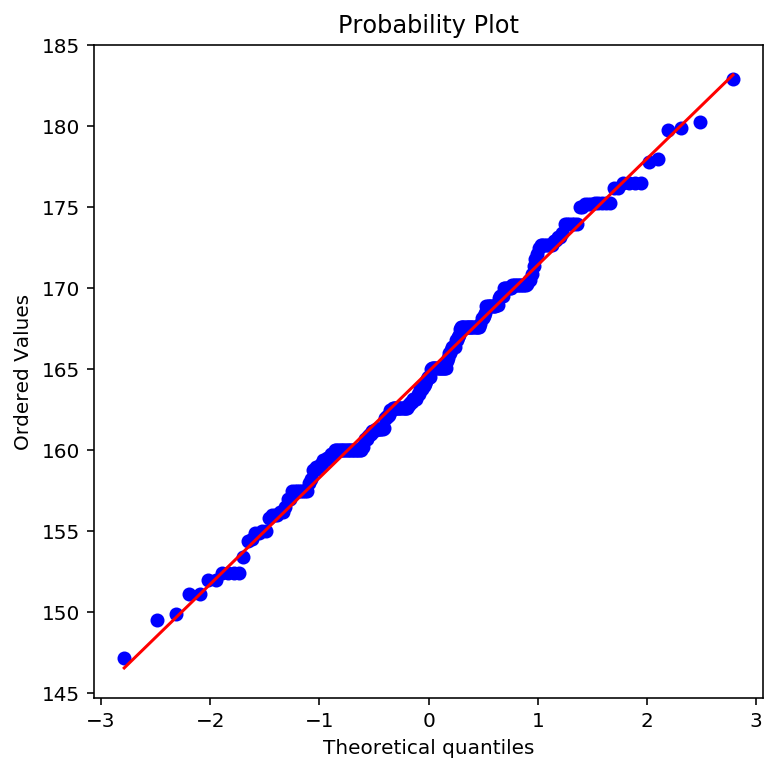

In [15]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

probplot(fdims['hgt'], plot = plt)
plt.show();

A data set that is nearly normal will result in a probability plot where the points closely follow the line. Any deviations from normality leads to deviations of these points from the line. The plot for female heights shows points that tend to follow the line but with some errant points towards the tails. We're left with the same problem that we encountered with the histogram above: how close is close enough?

A useful way to address this question is to rephrase it as: what do probability plots look like for data that I know came from a normal distribution? We can answer this by simulating data from a normal distribution using `numpy.random.normal()`.

In [16]:
import numpy as np

sim_norm = np.random.normal(size = len(fdims['hgt']), loc = fhgtmean, scale = fhgtsd)

The first argument indicates how many numbers you'd like to generate, which we specify to be the same number of heights in the  `fdims` data set using the `len()` function. The last two arguments (`loc` and `scale`) determine the mean and standard deviation of the normal distribution from which the simulated sample will be generated. We can take a look at the shape of our simulated data set,  `sim_norm`, as well as its normal probability plot.

<div class = 'exercise'>
<h4>Exercise 3</h4>
Make a normal probability plot of <code>sim_norm</code>. Do all of the points fall on the line? How does this plot compare to the probability plot for the real data?
</div>

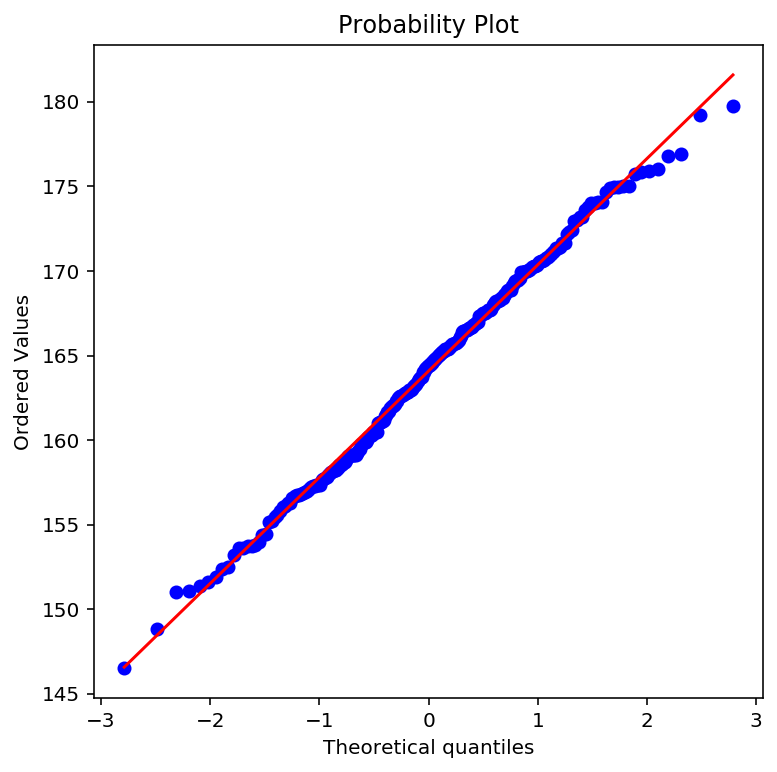

In [17]:
# to draw a normal Q-Q plot
probplot(sim_norm, plot = plt)
plt.show();

### Answer of Exercise 3

No, some points on the low end do not fall on the line. Although there are some outliers in this plot, they do now lower than the line much. There are some outliers on the low end in this plot, but Q-Q plot of the real data does not have outliers. 

Even better than comparing the original plot to a single plot generated from a normal distribution is to compare it to many more plots using the following function:

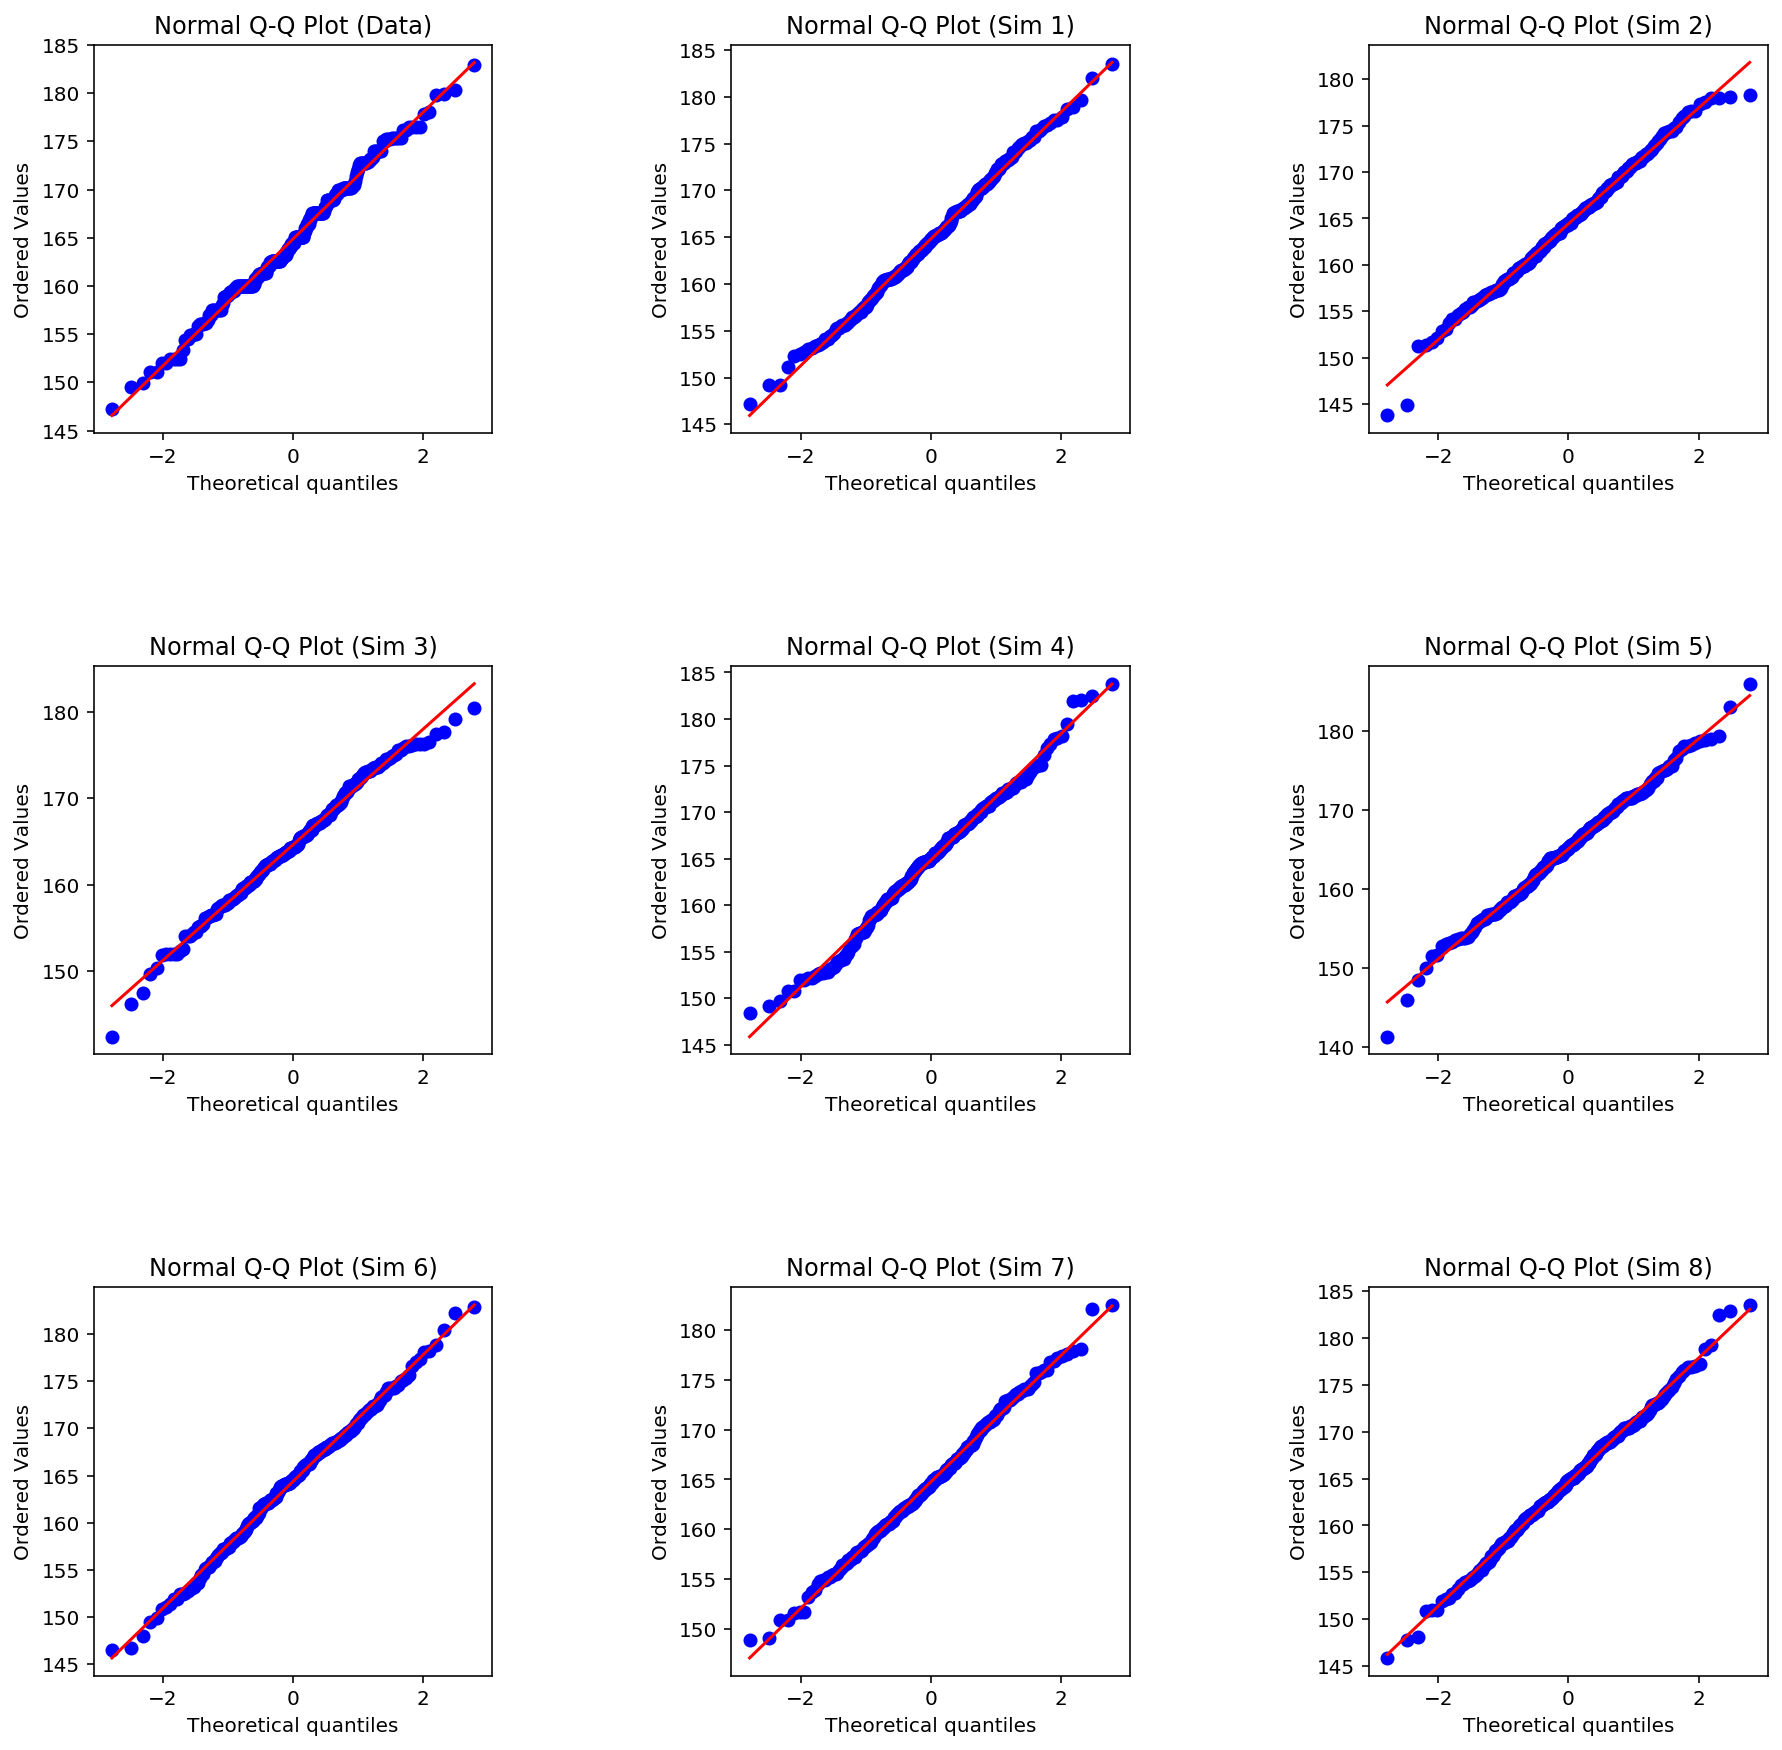

In [18]:
# draw random samples from a normal distribution eight times, 
# so we can construct eight different normal probability plots
sim_norm_8 = []
for i in range(8):
    sim_norm_8.append(np.random.normal(size = len(fdims['hgt']), loc = fhgtmean, scale = fhgtsd))

# compare the original plot to nine plots generated from a normal distribution.
plt.rcParams['figure.figsize'] = (15, 15)
plt.tight_layout(pad = 1) # adjust the subplots to fit in to the figure area.
plt.subplots_adjust(hspace = 0.6, wspace = 0.6) # adjust the amount of width and height reserved for space between subplots.

plt.subplot(3, 3, 1)
probplot(fdims['hgt'], plot = plt)
plt.title('Normal Q-Q Plot (Data)')

plt.subplot(3, 3, 2)
probplot(sim_norm_8[0], plot = plt)
plt.title('Normal Q-Q Plot (Sim 1)')

plt.subplot(3, 3, 3)
probplot(sim_norm_8[1], plot = plt)
plt.title('Normal Q-Q Plot (Sim 2)')

plt.subplot(3, 3, 4)
probplot(sim_norm_8[2], plot = plt)
plt.title('Normal Q-Q Plot (Sim 3)')

plt.subplot(3, 3, 5)
probplot(sim_norm_8[3], plot = plt)
plt.title('Normal Q-Q Plot (Sim 4)')

plt.subplot(3, 3, 6)
probplot(sim_norm_8[4], plot = plt)
plt.title('Normal Q-Q Plot (Sim 5)')

plt.subplot(3, 3, 7)
probplot(sim_norm_8[5], plot = plt)
plt.title('Normal Q-Q Plot (Sim 6)')

plt.subplot(3, 3, 8)
probplot(sim_norm_8[6], plot = plt)
plt.title('Normal Q-Q Plot (Sim 7)')

plt.subplot(3, 3, 9)
probplot(sim_norm_8[7], plot = plt)
plt.title('Normal Q-Q Plot (Sim 8)')

plt.show();

<div class = 'exercise'>
<h4>Exercise 4</h4>
Does the normal probability plot for <code>fdims['hgt']</code> look similar to the plots created for the simulated data? That is, do plots provide evidence that the female heights are nearly normal?
</div>

### Answer of Exercise 4

Yes, these plots and the normal probability plot for fdims['hgt'] look similar. Because these Q-Q plots of simulated data set are all nearly normal, the data of women's heights can be regarded as a nearly normal.

<div class = 'exercise'>
<h4>Exercise 5</h4>
Using the same technique, determine whether or not female weights appear to come from a normal distribution.
</div>

### Answer of Exercise 5

- 1) to calculate the mean and std of women's weights
- 2) to draw hist plot with normal distribution line
- 3) to draw Q-Q plots
- 4) to simulate the data set of women's weights and to draw the Q-Q plots

In [19]:
fdims['wgt'].describe()

count    260.000000
mean      60.600385
std        9.615699
min       42.000000
25%       54.500000
50%       59.000000
75%       65.600000
max      105.200000
Name: wgt, dtype: float64

In [20]:
# 1) calculate the mean and std
fwgtmean = fdims['wgt'].mean()
fwgtstd = fdims['wgt'].std()
print("mean of women's weight is %0.4f, std of women's weight is %0.4f" %(fwgtmean, fwgtstd))

mean of women's weight is 60.6004, std of women's weight is 9.6157


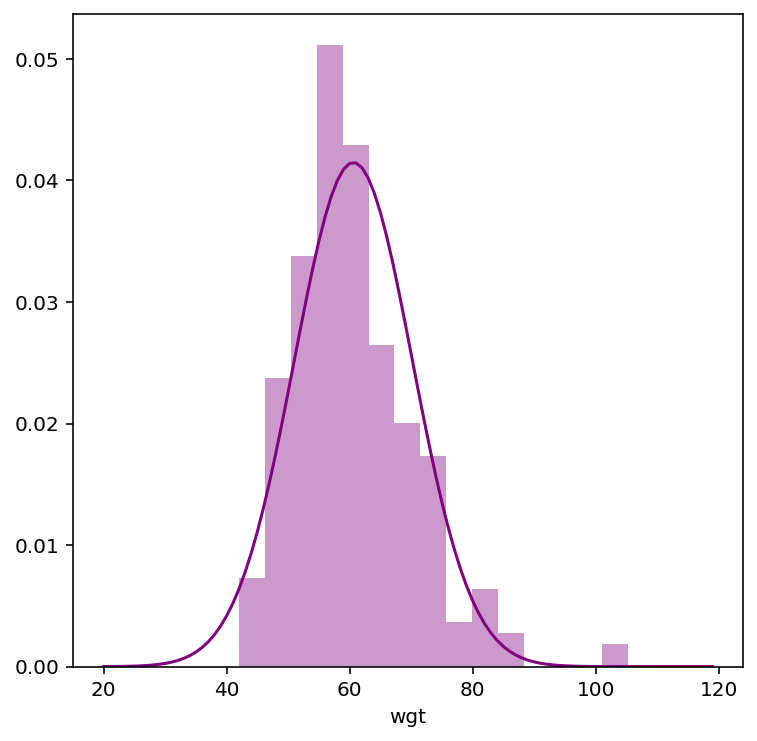

In [21]:
# 2) draw hist plot with normal distribution line
plt.rcParams['figure.figsize'] = (6, 6)

fhgt_hist = sns.distplot(fdims['wgt'], norm_hist = True, kde = False, color = 'purple', bins = 15)
x = np.arange(20, 120)                                                  
y = norm.pdf(x, loc = fwgtmean, scale = fwgtstd)                                                         
fhgt_hist.plot(x, y, 'purple');

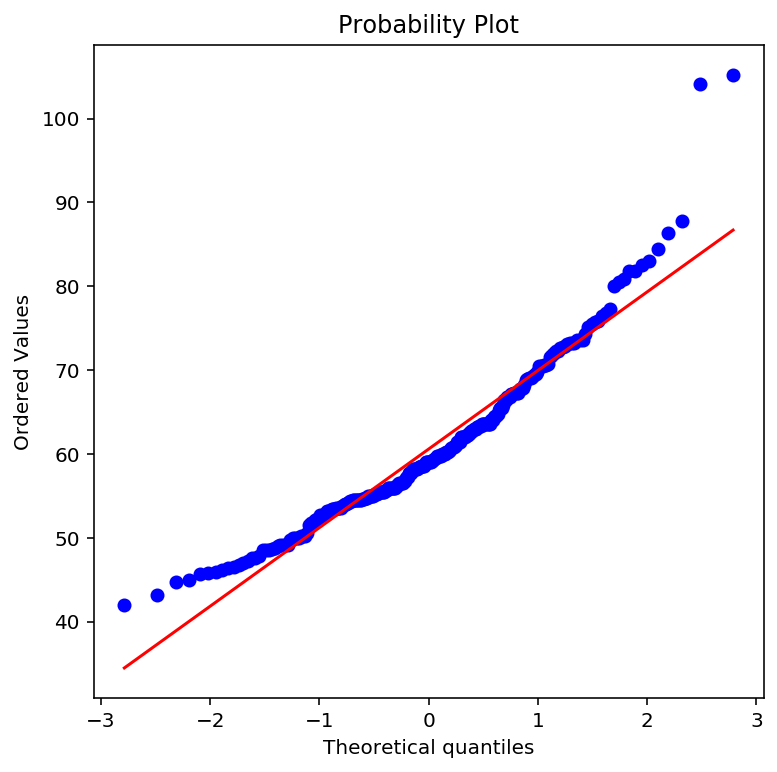

In [22]:
# 3) to draw Q-Q plots
probplot(fdims['wgt'], plot = plt)
plt.show();

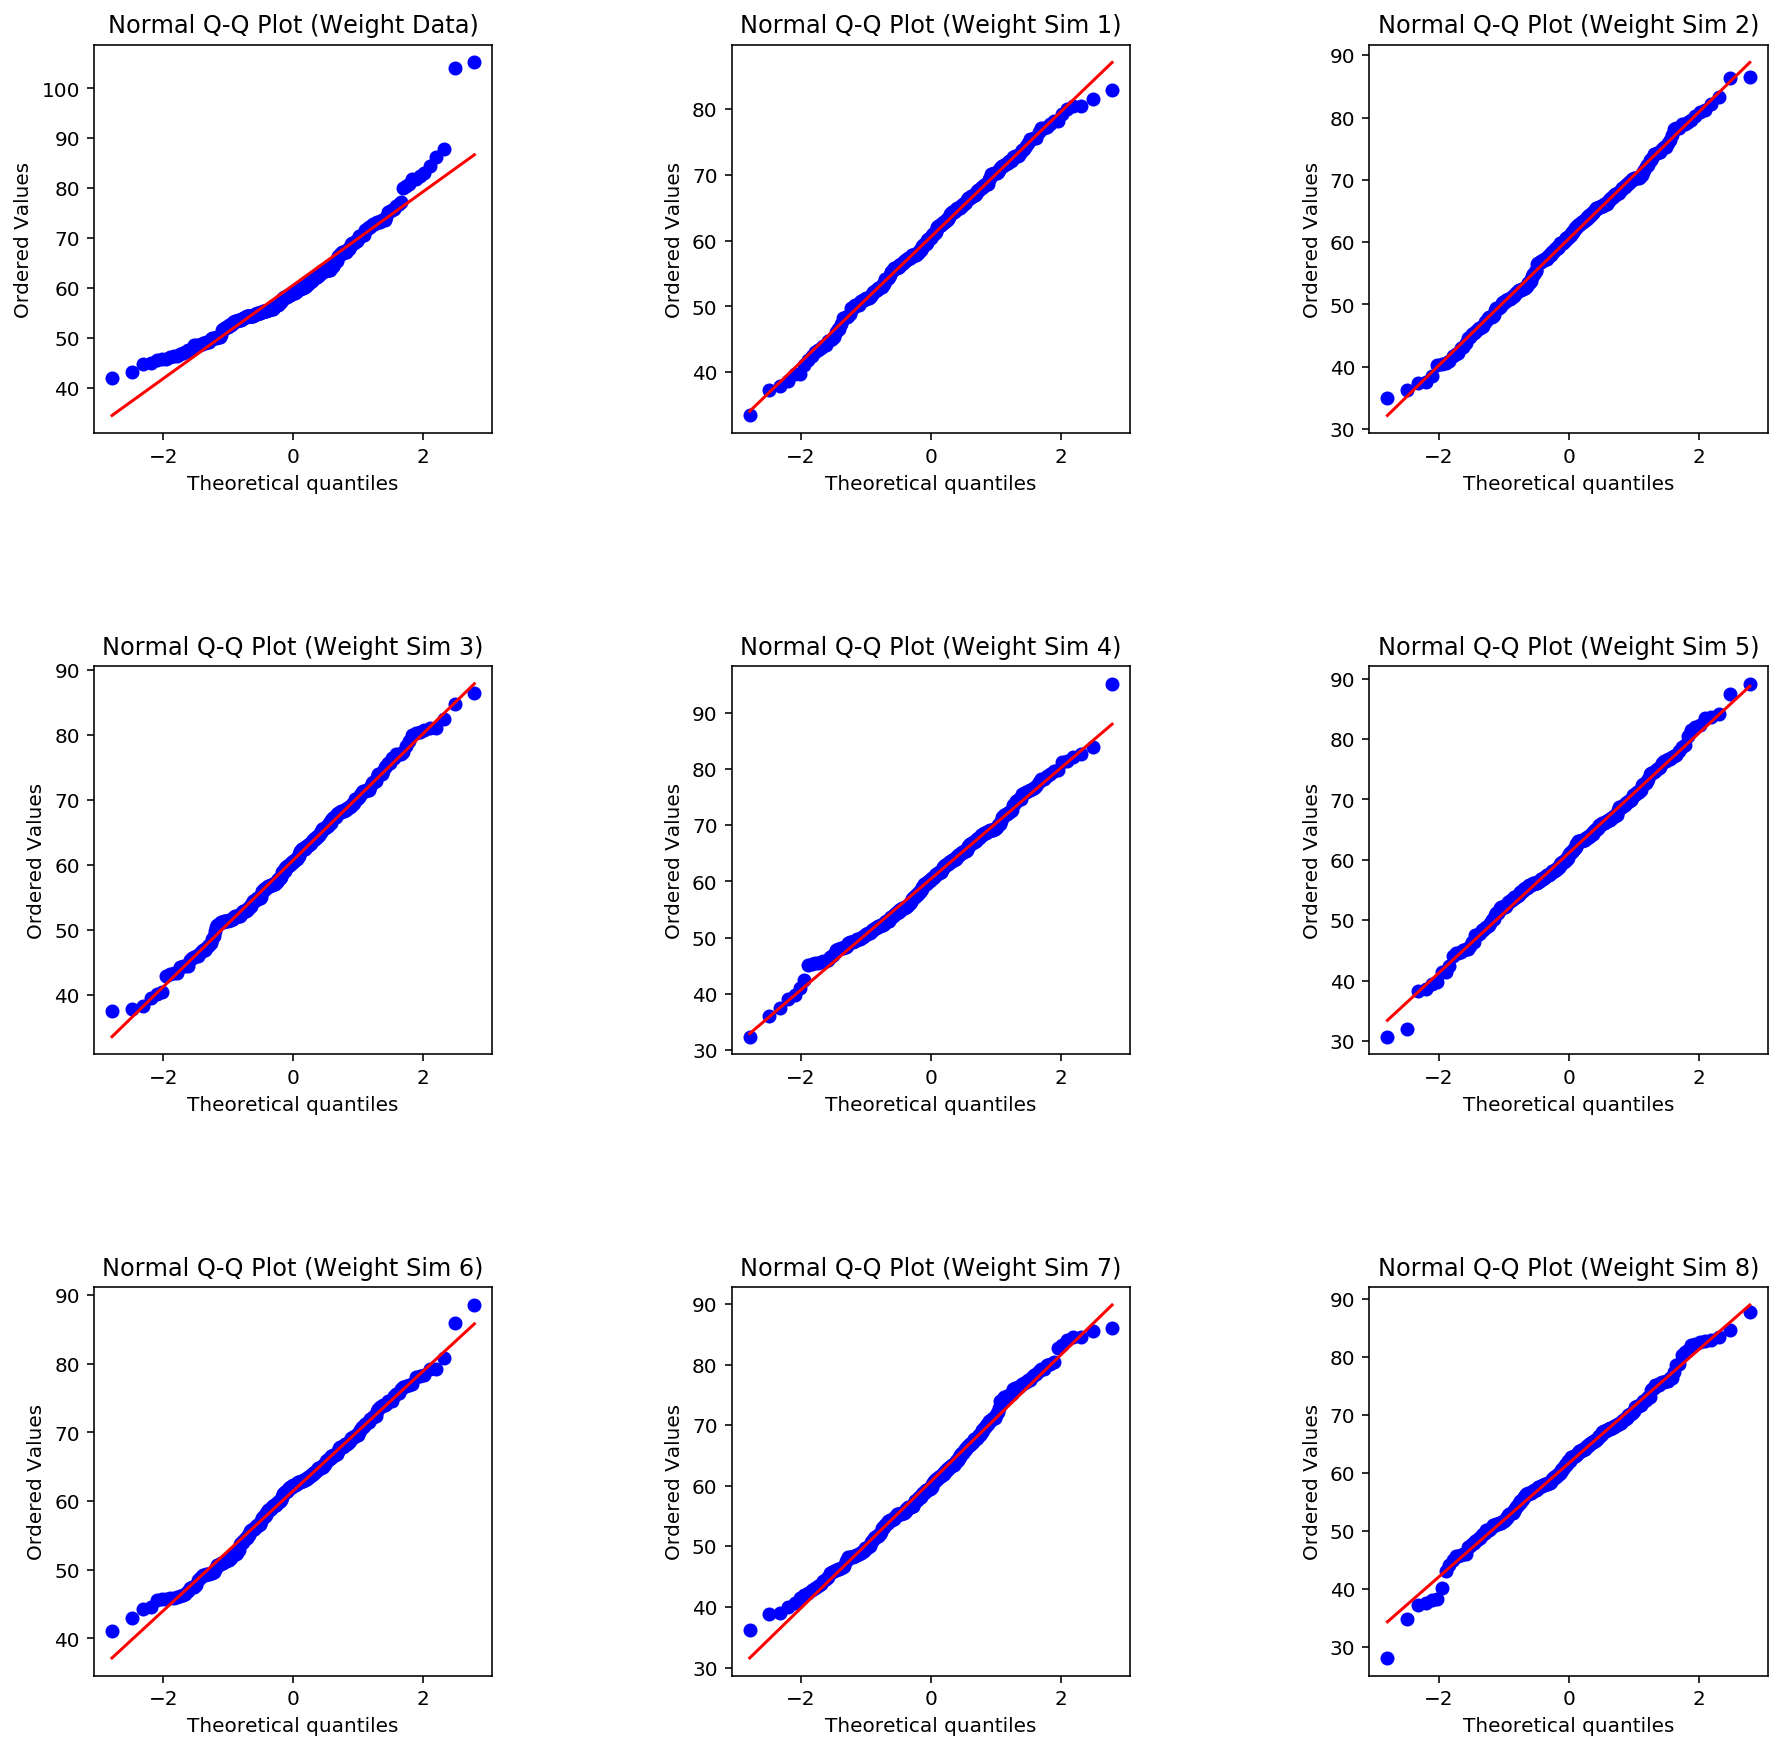

In [23]:
# draw random samples from a normal distribution eight times, 
# so we can construct eight different normal probability plots
sim_norm_8 = []
for i in range(8):
    sim_norm_8.append(np.random.normal(size = len(fdims['wgt']), loc = fwgtmean, scale = fwgtstd))

# compare the original plot to nine plots generated from a normal distribution.
plt.rcParams['figure.figsize'] = (15, 15)
plt.tight_layout(pad = 1) # adjust the subplots to fit in to the figure area.
plt.subplots_adjust(hspace = 0.6, wspace = 0.6) # adjust the amount of width and height reserved for space between subplots.

plt.subplot(3, 3, 1)
probplot(fdims['wgt'], plot = plt)
plt.title('Normal Q-Q Plot (Weight Data)')

plt.subplot(3, 3, 2)
probplot(sim_norm_8[0], plot = plt)
plt.title('Normal Q-Q Plot (Weight Sim 1)')

plt.subplot(3, 3, 3)
probplot(sim_norm_8[1], plot = plt)
plt.title('Normal Q-Q Plot (Weight Sim 2)')

plt.subplot(3, 3, 4)
probplot(sim_norm_8[2], plot = plt)
plt.title('Normal Q-Q Plot (Weight Sim 3)')

plt.subplot(3, 3, 5)
probplot(sim_norm_8[3], plot = plt)
plt.title('Normal Q-Q Plot (Weight Sim 4)')

plt.subplot(3, 3, 6)
probplot(sim_norm_8[4], plot = plt)
plt.title('Normal Q-Q Plot (Weight Sim 5)')

plt.subplot(3, 3, 7)
probplot(sim_norm_8[5], plot = plt)
plt.title('Normal Q-Q Plot (Weight Sim 6)')

plt.subplot(3, 3, 8)
probplot(sim_norm_8[6], plot = plt)
plt.title('Normal Q-Q Plot (Weight Sim 7)')

plt.subplot(3, 3, 9)
probplot(sim_norm_8[7], plot = plt)
plt.title('Normal Q-Q Plot (Weight Sim 8)')

plt.show();

### Conclusion of Exercise 5

The above hist plot, Q-Q plot, and Q-Q plots of simulation data set show that the women's weights are not a normal distribution. There are many outliers on the low end and the high end are far off the normal line. But the simulation data sets do not have so many outliers. The women's weights do not show the normal distribution.

## Normal probabilities

Okay, so now you have a slew of tools to judge whether or not a variable is normally distributed. Why should we care?

It turns out that statisticians know a lot about the normal distribution. Once we decide that a random variable is approximately normal, we can answer all sorts of questions about that variable related to probability. Take, for example, the question of, "What is the probability that a randomly chosen young adult female is taller than 6 feet (about 182 cm)?" (The study that published this data set is clear to point out that the sample was not random and therefore inference to a general population is not suggested. We do so here only as an exercise.)

If we assume that female heights are normally distributed (a very close approximation is also okay), we can find this probability by calculating a Z score and consulting a Z table (also called a *normal probability table*). In Python, this is done in one step with the function `norm.cdf()` from `scipy.stats`.

In [24]:
from scipy.stats import norm

prob_using_Z = 1 - norm.cdf(182, loc = fhgtmean, scale = fhgtsd)
round(prob_using_Z, 4)

0.0044

Note that the function `norm.cdf()` gives the area under the normal curve below a given value, with a given mean and standard deviation. Since we're interested in the probability that someone is taller than 182 cm, we have to take one minus that probability.

Assuming a normal distribution has allowed us to calculate a theoretical probability. If we want to calculate the probability empirically, we simply need to determine how many observations fall above 182 then divide this number by the total sample size.

In [25]:
prob_using_theoretical = (sum(fdims['hgt'] > 182) / len(fdims['hgt']))
round(prob_using_theoretical, 4)

0.0038

Although the probabilities are not exactly the same, they are reasonably close. The closer that your distribution is to being normal, the more accurate the theoretical probabilities will be.

<div class = 'exercise'>
<h4>Exercise 6</h4>
Write out two probability questions that you would like to answer; one regarding female heights and one regarding female weights. Calculate the those probabilities using both the theoretical normal distribution as well as the empirical distribution (four probabilities in all). Which variable, height or weight, had a closer agreement between the two methods?
</div>

### Answer of Exercise 6
- 1) "What is the probability that a randomly chosen young adult female is lower than 168.50 cm)?"
- 2) "What is the probability that a randomly chosen young adult female is higher than 58.5 kg)?"

#### 1) "What is the probability that a randomly chosen young adult female is lower than 168.50 cm)?"

In [26]:
# 1.1) Using the theoretical normal distribution to show
prob_using_Z = norm.cdf(168.50, loc = fhgtmean, scale = fhgtsd)
print("The probability of women's heights that is lower than 168.50 cm is ", round(prob_using_Z, 4))

The probability of women's heights that is lower than 168.50 cm is  0.7103


In [27]:
# 1.2) Using the empirical distribution to show
prob_using_theoretical = (sum(fdims['hgt'] < 168.50) / len(fdims['hgt']))
print("The probability of women's heights that is lower than 168.50 cm is ", round(prob_using_theoretical, 4))

The probability of women's heights that is lower than 168.50 cm is  0.6962


#### 2) "What is the probability that a randomly chosen young adult female is higher than  58.5 kg)?"

In [28]:
# 2.1) Using the theoretical normal distribution to show
prob_using_Z = 1 - norm.cdf(58.5, loc = fwgtmean, scale = fwgtstd)
print("The probability of women's weights that is lower than58.5 kg is ", round(prob_using_Z, 4))

The probability of women's weights that is lower than58.5 kg is  0.5865


In [29]:
# 1.2) Using the empirical distribution to show
prob_using_theoretical = (sum(fdims['wgt'] > 58.50) / len(fdims['wgt']))
print("The probability of women's heights that is lower than 168.50 cm is ", round(prob_using_theoretical, 4))

The probability of women's heights that is lower than 168.50 cm is  0.5308


---
## On Your Own

<ol>
    <li>Now let's consider some of the other variables in the body dimensions data set. Using the figures at the end of the exercises, match the histogram to its normal probability plot. All of the variables have been standardized (first subtract the mean, then divide by the standard deviation), so the units won't be of any help. If you are uncertain based on these figures, generate the plots with Python to check.</li><br>
    <ul>
        <li>The histogram for female biiliac (pelvic) diameter (<code>bii.di</code>) belongs to normal probability plot letter ____.</li>
        <li>The histogram for female elbow diameter (<code>elb.di</code>) belongs to normal probability plot letter ____.</li>
        <li>The histogram for general age (<code>age</code>) belongs to normal probability plot letter ____.</li>
        <li>The histogram for female chest depth (<code>che.de</code>) belongs to normal probability plot letter ____.</li>
    </ul><br>
    <li>Note that normal probability plots C and D have a slight stepwise pattern. Why do you think this is the case?</li><br>
    <li>As you can see, normal probability plots can be used both to assess normality and visualize skewness. Make a normal probability plot for female knee diameter (<code>kne.di</code>). Based on this normal probability plot, is this variable left skewed, symmetric, or right skewed? Use a histogram to confirm your findings.</li><br>
</ol>
<img src='https://github.com/vaksakalli/stats_tutorials/blob/master/histQQmatch.png?raw=true'>


<div class = "license">
This lab was adapted by Vural Aksakalli and Imran Ture from OpenIntro by Andrew Bray and Mine Çetinkaya-Rundel.
</div>

***
www.featureranking.com

# Answer of On Your Own

### Answer of Q1

- 1) The histogram for female biiliac (pelvic) diameter (bii.di) belongs to normal probability plot letter B.
- 2) The histogram for female elbow diameter (elb.di) belongs to normal probability plot letter C.
- 3) The histogram for general age (age) belongs to normal probability plot letter D.
- 4) The histogram for female chest depth (che.de) belongs to normal probability plot letter A.

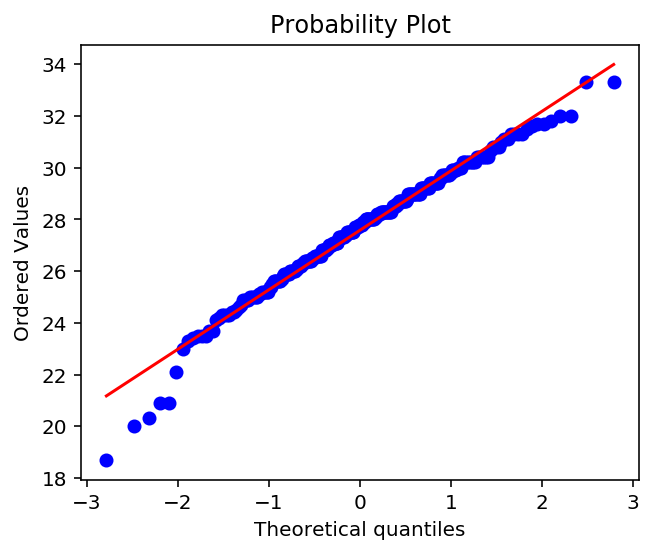

In [30]:
# to draw the Q-Q plot of female biiliac (pelvic) diameter (bii.di)
plt.figure(figsize=(5, 4))
probplot(fdims['bii.di'], plot = plt)
plt.show();

The above Q-Q plot of female biiliac (pelvic) diameter (bii.di) is same with B.

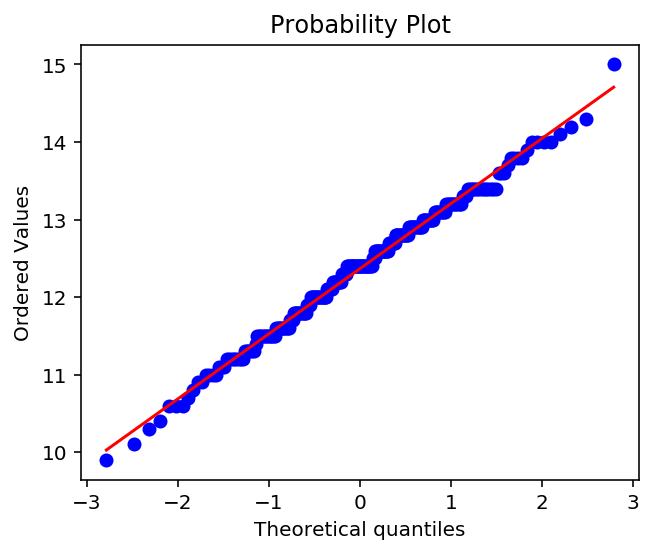

In [31]:
# to draw the Q-Q plot of female elbow diameter (elb.di)
plt.figure(figsize=(5, 4))
probplot(fdims['elb.di'], plot = plt)
plt.show();

The above Q-Q plot of female biiliac (pelvic) diameter (bii.di) is same with C.

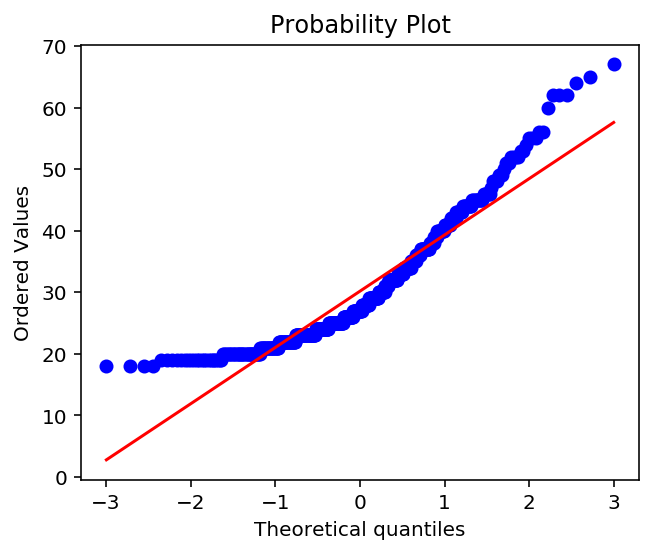

In [32]:
# to draw the Q-Q plot of general age (age)
plt.figure(figsize=(5, 4))
probplot(bdims['age'], plot = plt)
plt.show();

The histogram for general age (age) belongs to normal probability plot letter D.

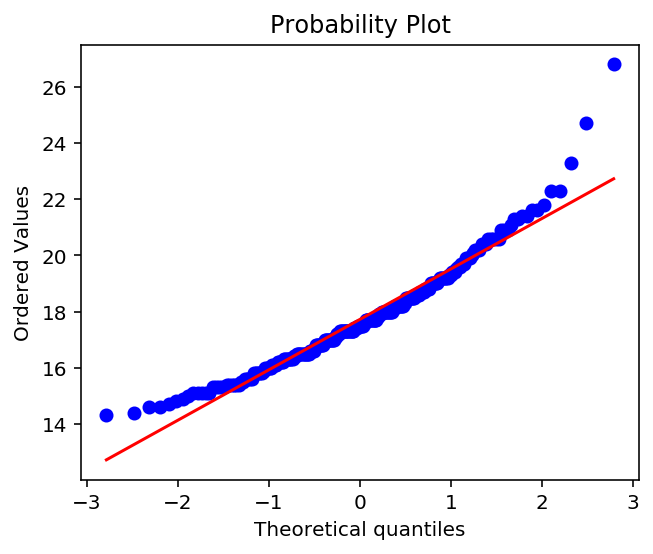

In [33]:
# to draw the Q-Q plot of female chest depth (che.de)
plt.figure(figsize=(5, 4))
probplot(fdims['che.de'], plot = plt)
plt.show();

The histogram for female chest depth (che.de) belongs to normal probability plot letter A.

### Answer of Q2

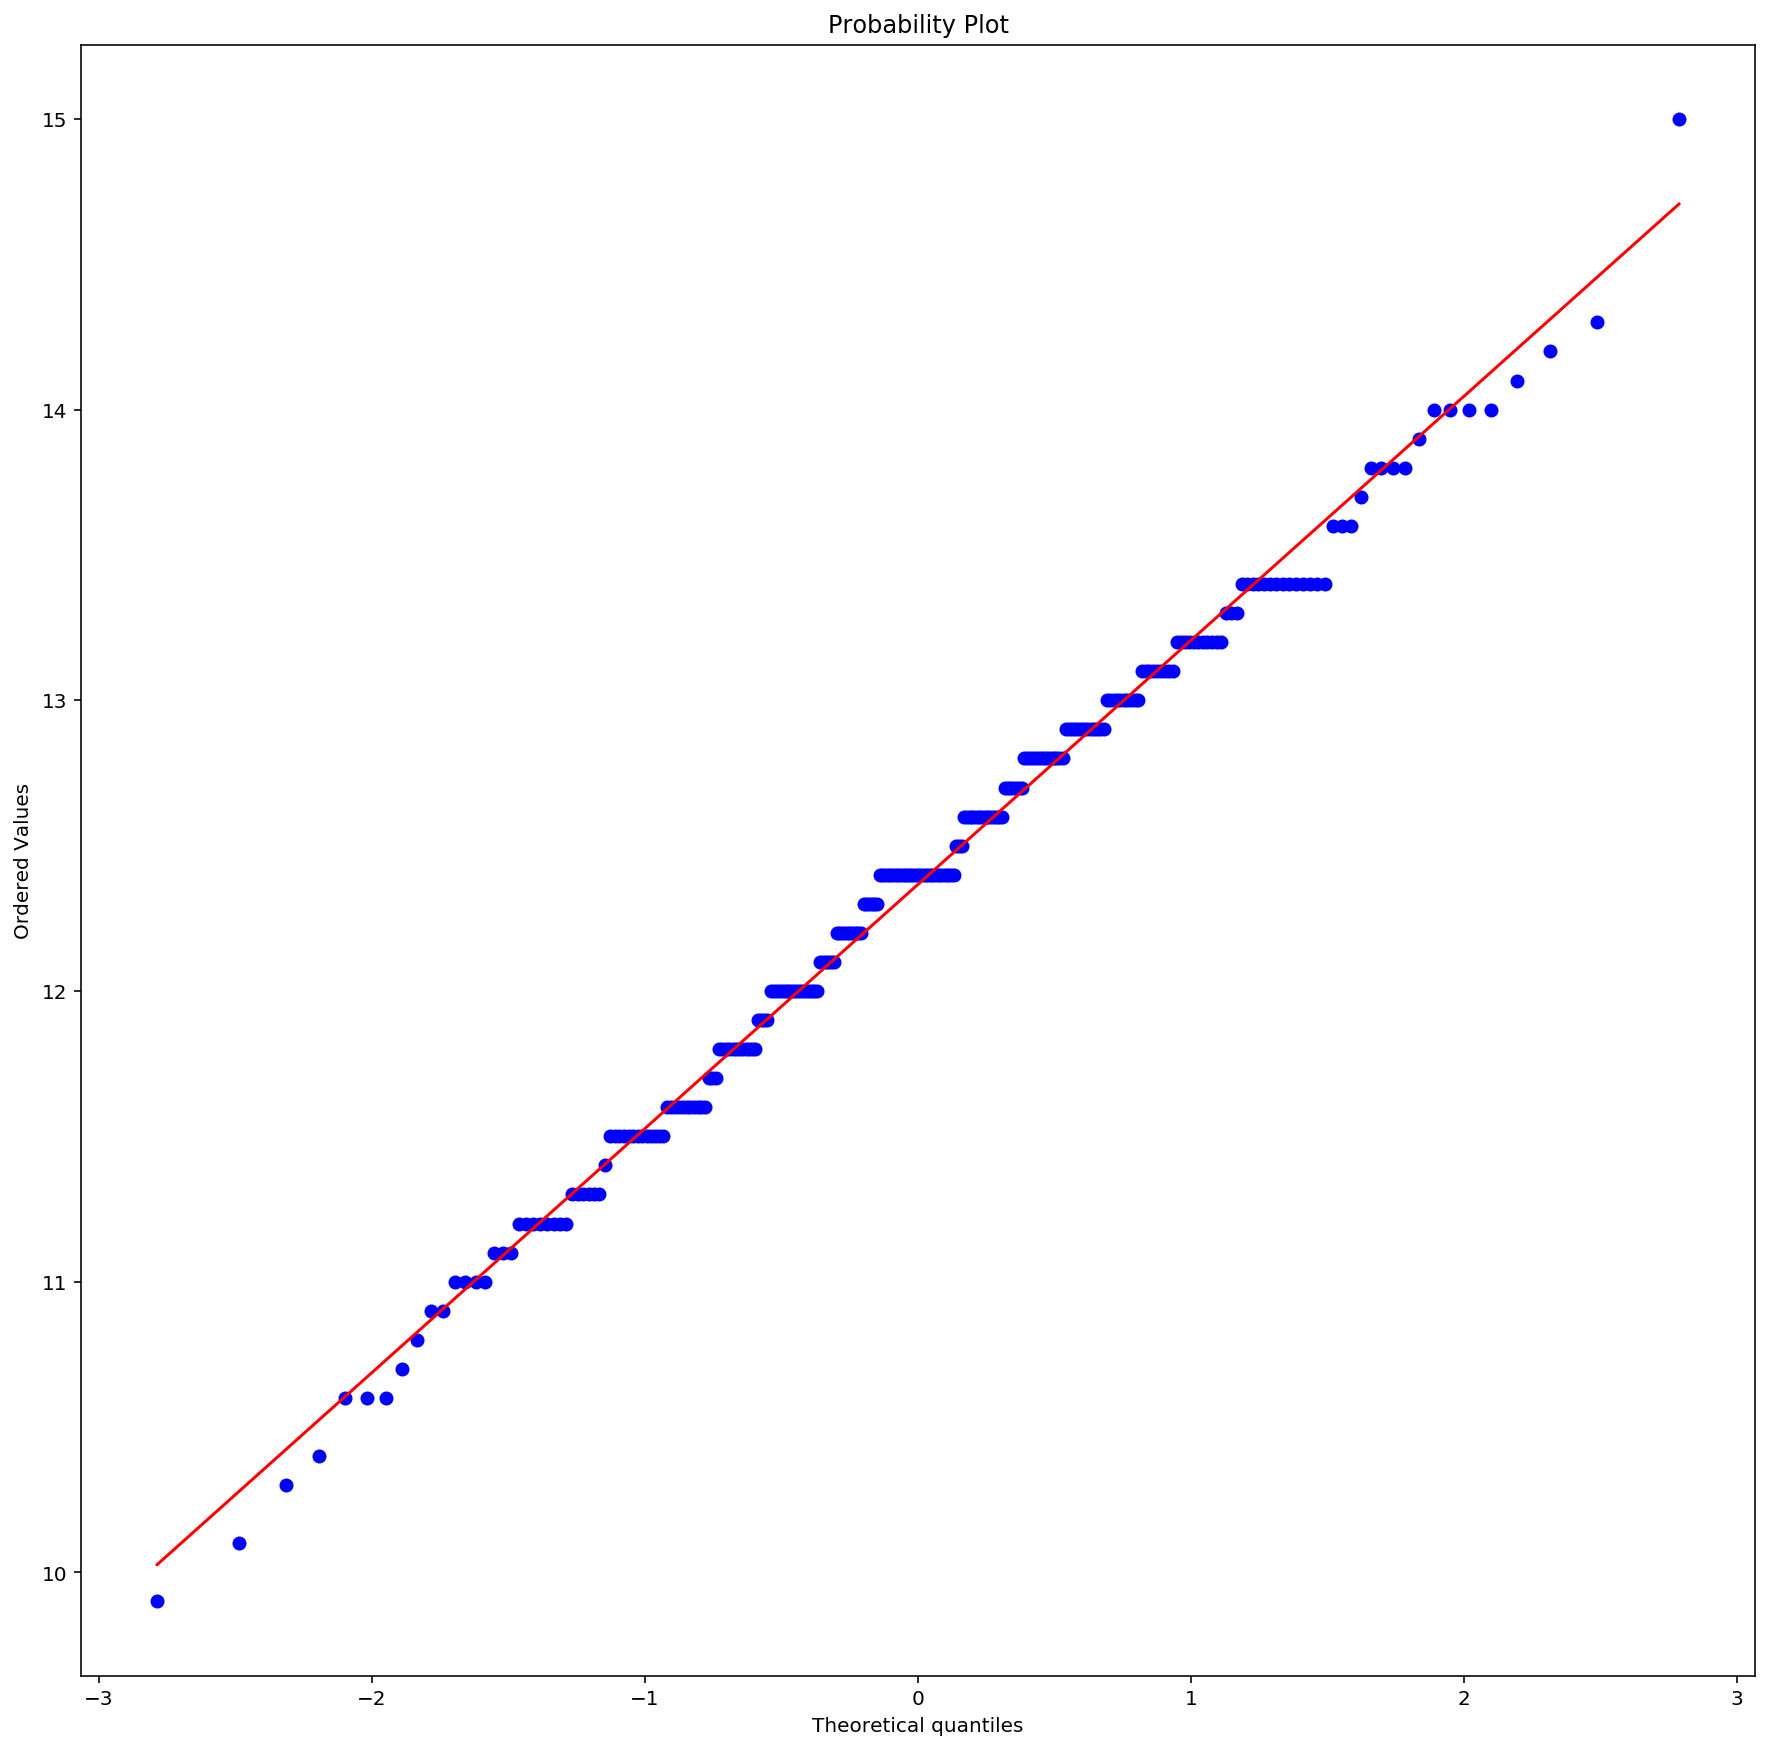

In [34]:
# To draw Q-Q plot of female elbow diameter (elb.di) 
plt.figure(figsize=(15, 15))
probplot(fdims['elb.di'], plot = plt)
plt.show();

In [35]:
fdims['elb.di'].head()

247    11.2
248    12.1
249    11.3
250    12.3
251    11.5
Name: elb.di, dtype: float64

The Q-Q plot show a slight stepwise pattern because the female elbow diameter only keeps one decimal place.

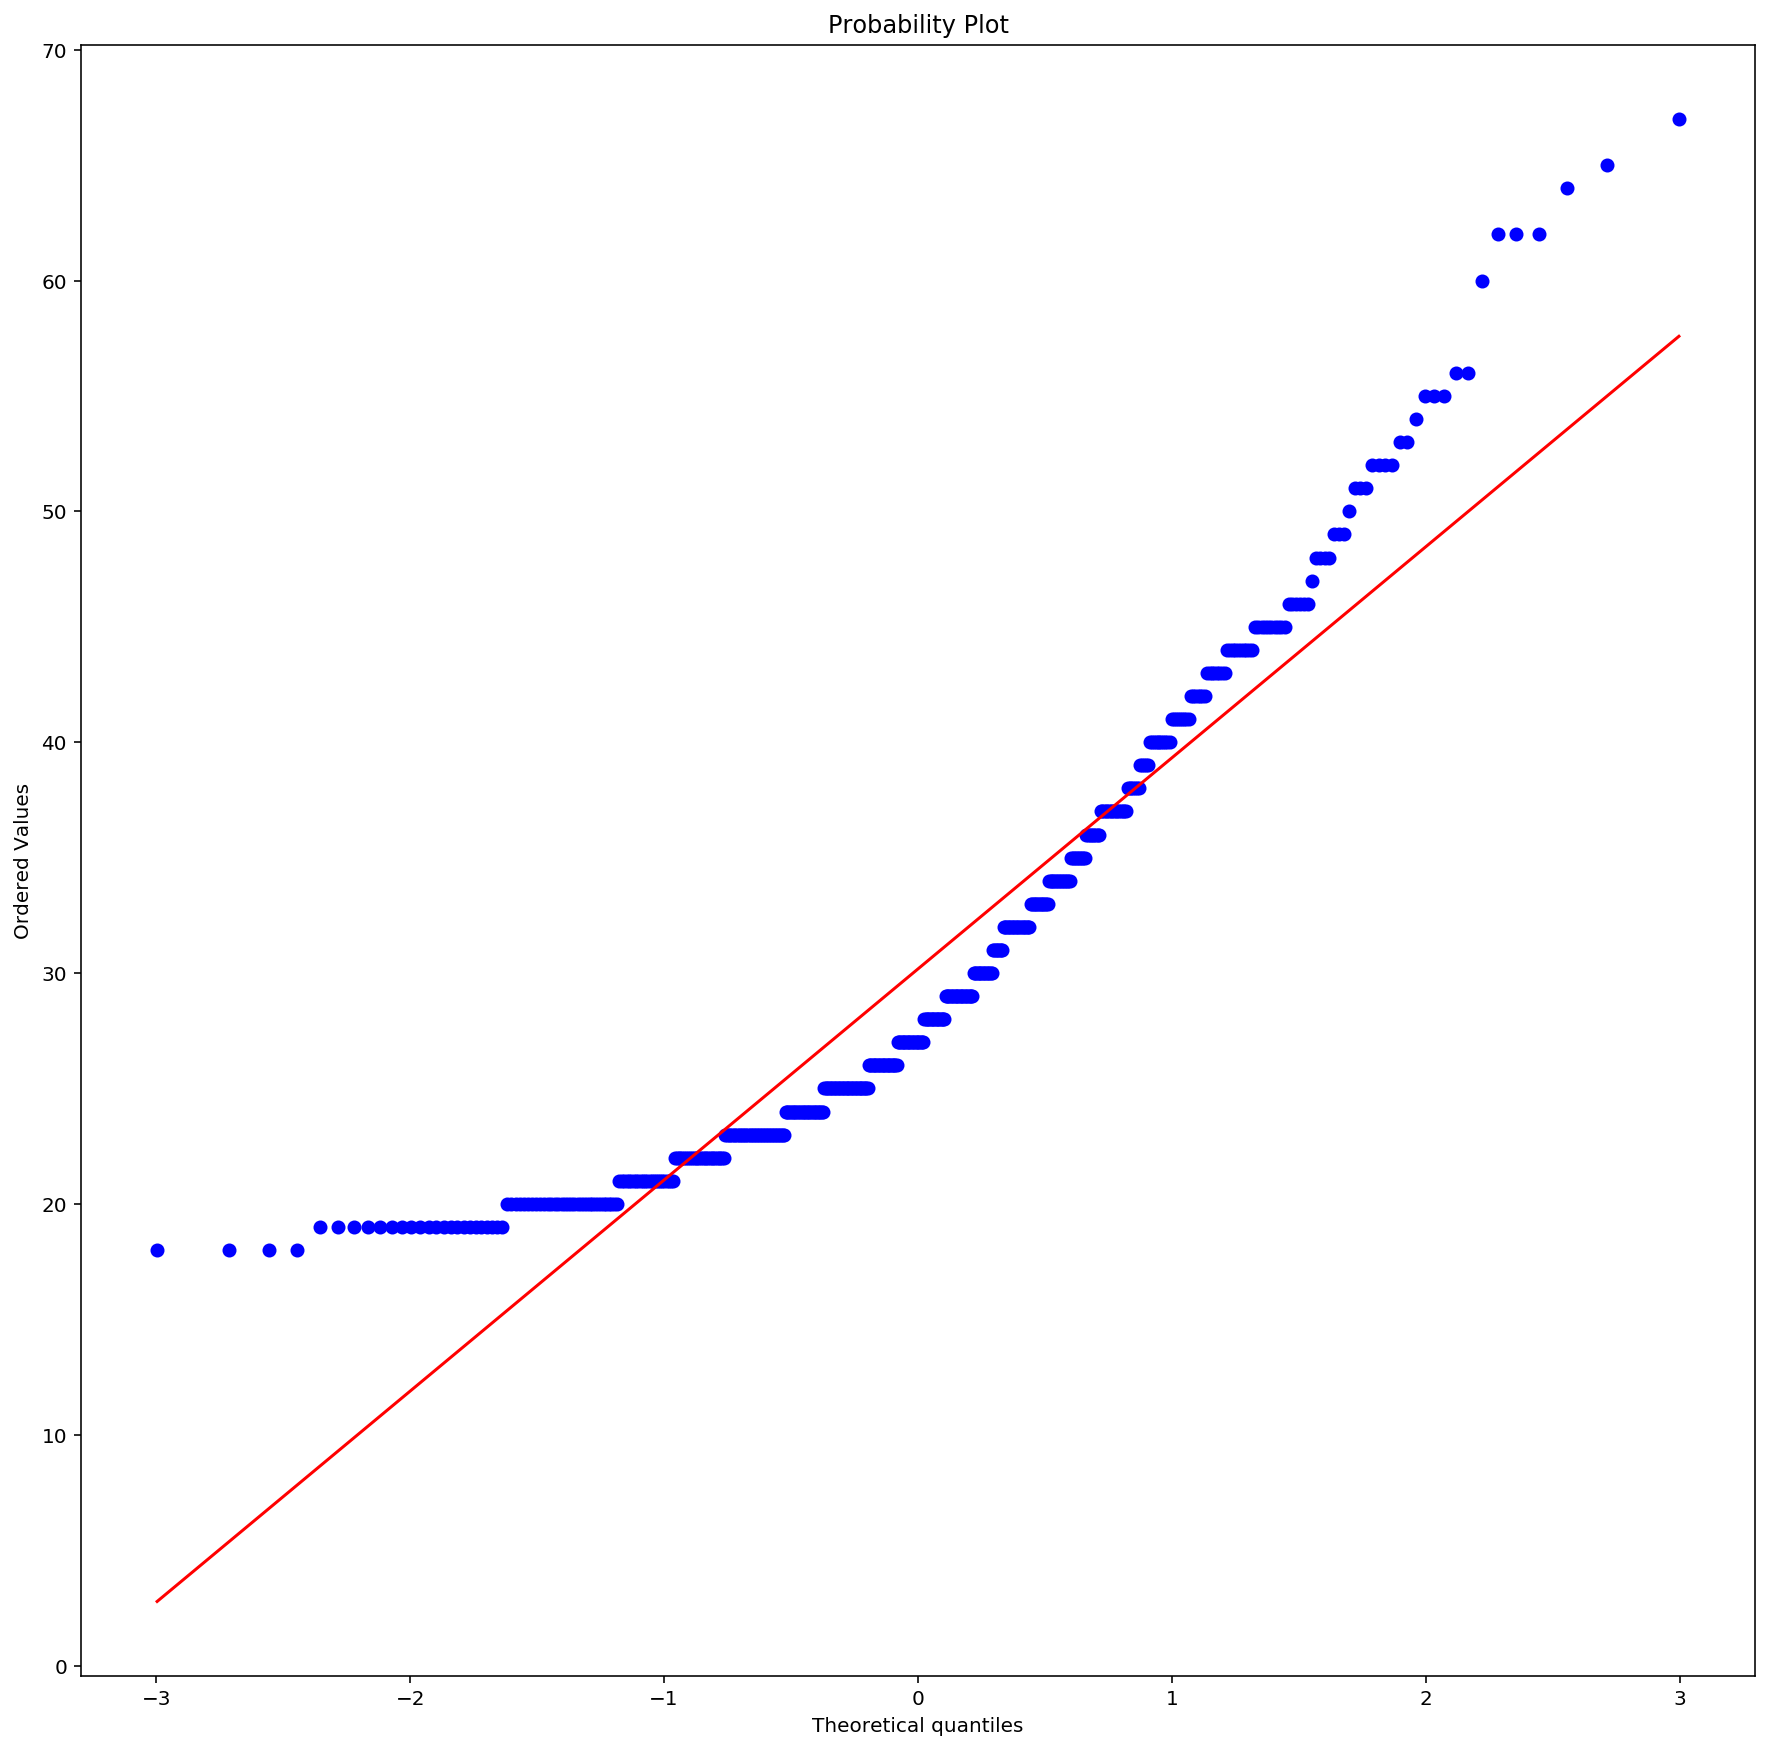

In [36]:
# To draw Q-Q plot of general age (age) 
plt.figure(figsize=(15, 15))
probplot(bdims['age'], plot = plt)
plt.show();

In [37]:
bdims['age'].head()

0    21
1    23
2    28
3    23
4    22
Name: age, dtype: int64

The Q-Q plot show a slight stepwise pattern because the gender age is an integer number.

### Conclustion of Q2
- The Q-Q plot show a slight stepwise pattern because the female elbow diameter only keeps one decimal place.
- The Q-Q plot show a slight stepwise pattern because the gender age is an integer number.

### Answer of Q3
As you can see, normal probability plots can be used both to assess normality and visualize skewness. Make a normal probability plot for female knee diameter (kne.di). Based on this normal probability plot, is this variable left skewed, symmetric, or right skewed? Use a histogram to confirm your findings.

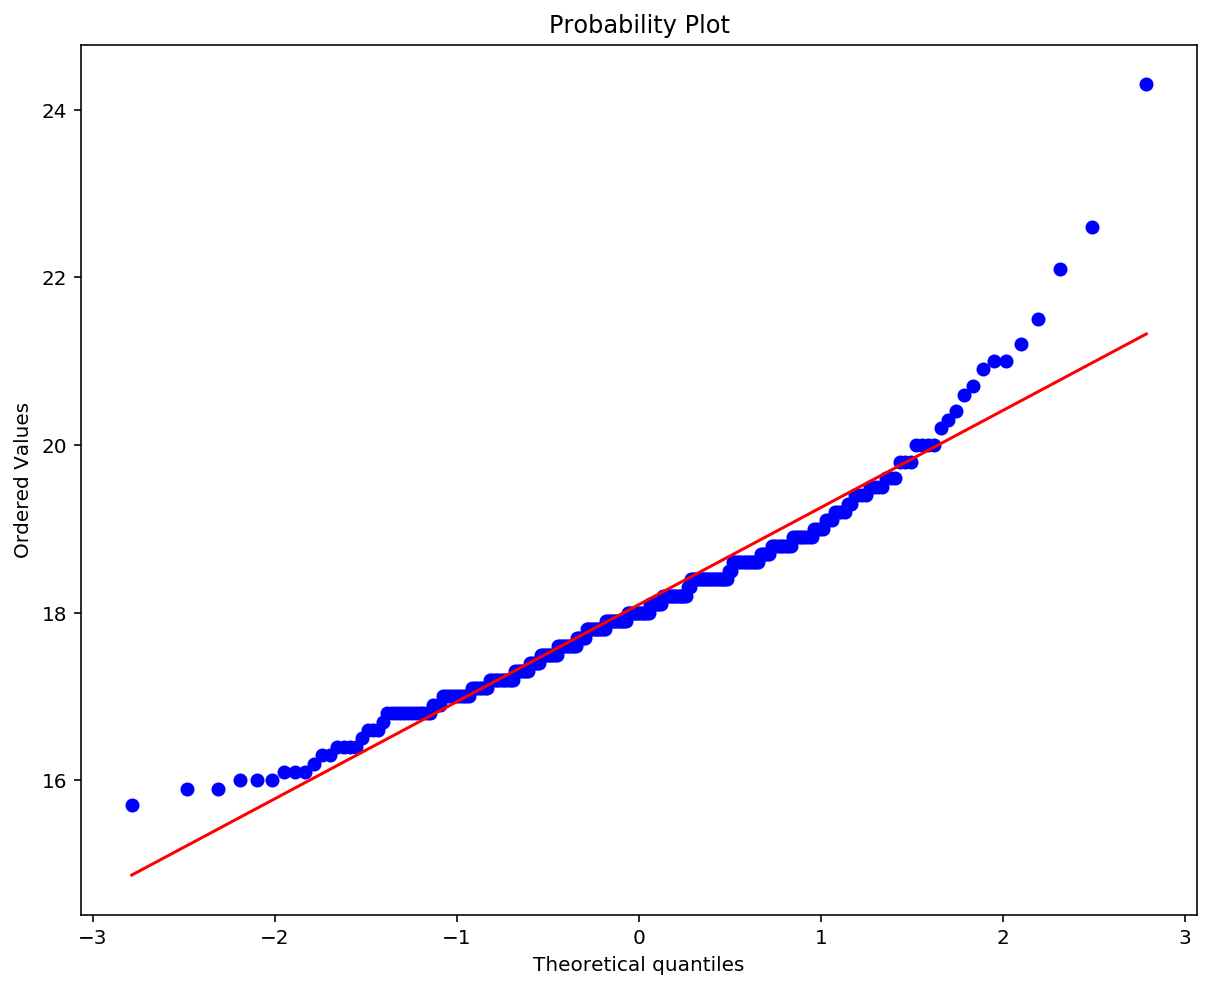

In [38]:
# 1) to draw the Q-Q plot of female knee diameter (kne.di).
plt.figure(figsize=(10, 8))
probplot(fdims['kne.di'], plot = plt)
plt.show();

It shows a right skew and it is not symmetric.

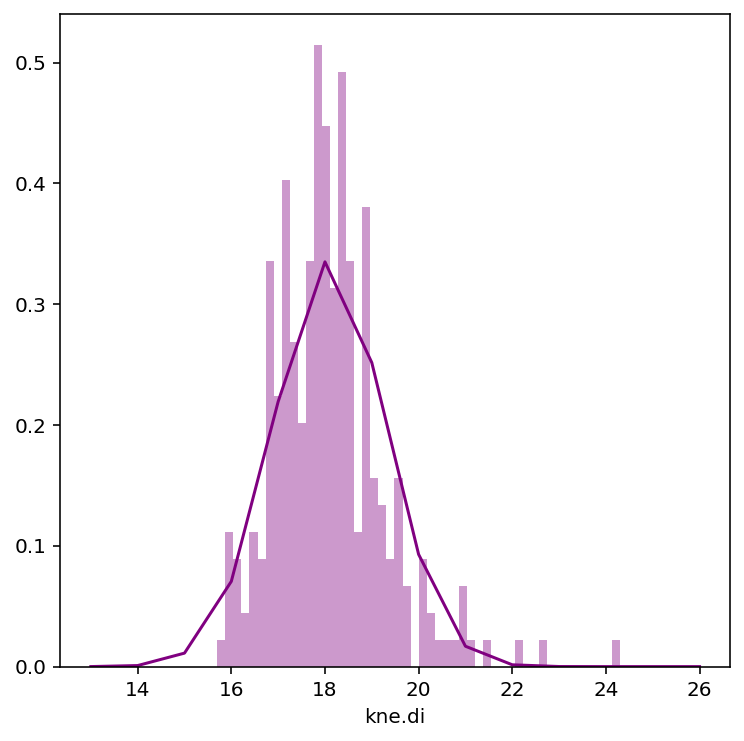

In [40]:
# to draw hist plot of women's knee diameter (kne.di)

f_knedi_mean = fdims['kne.di'].mean()
f_knedi_std = fdims['kne.di'].std()

plt.rcParams['figure.figsize'] = (6, 6)

fhgt_hist = sns.distplot(fdims['kne.di'], norm_hist = True, kde = False, color = 'purple', bins = 50)
x = np.arange(13, 27)                                                  
y = norm.pdf(x, loc = f_knedi_mean, scale = f_knedi_std)                                                         
fhgt_hist.plot(x, y, 'purple');

### Conclusion of Q3

First, there are many outlers on the high end of the Q-Q plot. Second, these outliers also can be seen on the hist plot. The hist plot shows a right skew and it is not a symmetric. 